<h3>Modules/packages required</h3>

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as pyplot
from sklearn import linear_model
import statsmodels.api as sm
from pandas.api.types import is_string_dtype

<h3>Loading, exploring, manipulating the data</h3>

In [90]:
#reads the data
fw = pd.read_csv("foodwaste.csv") 

In [91]:
#gives datatypes of each column in the dataframe
fw.dtypes

geographicaream49                int64
country                         object
region                          object
measureditemcpc                float64
crop                            object
timepointyears                   int64
loss_per_clean                 float64
percentage_loss_of_quantity     object
loss_quantity                   object
loss_qualitiative               object
loss_monetary                   object
activity                        object
fsc_location1                   object
periodofstorage                 object
treatment                      float64
causeofloss                     object
samplesize                      object
units                          float64
method_datacollection           object
tag_datacollection              object
reference                       object
url                             object
dtype: object

In [92]:
#looking at the data
fw.head()

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,...,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN,NaN,...,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


In [93]:
#total number of missing values in the dataset
fw.isnull().sum().sum()
fw.shape

(16956, 22)

In [94]:
#total number of missing values in the causeofloss feature
fw['causeofloss'].isnull().sum().sum()

15828

In [95]:
#drop columns with NaN in causeofloss
fw_loss = fw[fw['causeofloss'].notna()]
fw_loss.shape

fw_loss

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,...,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
9,104,Myanmar,NaN,113.0,Rice,1994,0.5,0.5,NaN,NaN,...,Farm,NaN,NaN,Field Stacking And Bundling,NaN,NaN,NaN,-,NaN,http://www.fao.org/docrep/004/ac301e/AC301e04....
10,104,Myanmar,NaN,113.0,Rice,1994,1.9,1.9,NaN,NaN,...,Harvest,NaN,NaN,Traditional Hand Cutting,NaN,NaN,NaN,-,(Calverley: evaluation of 11 FAO projects in A...,http://www.fao.org/docrep/004/ac301e/AC301e04....
11,104,Myanmar,NaN,113.0,Rice,1994,2.1,2.1,NaN,NaN,...,Harvest,NaN,NaN,"Too Mature, Leading To Breakage",NaN,NaN,NaN,-,NaN,http://www.fao.org/docrep/004/ac301e/AC301e04....
12,104,Myanmar,NaN,113.0,Rice,1994,2.1,2.1,NaN,NaN,...,Harvest,NaN,NaN,Combine-Harvester,NaN,NaN,NaN,-,(Calverley: evaluation of 11 FAO projects in A...,http://www.fao.org/docrep/004/ac301e/AC301e04....
13,104,Myanmar,NaN,113.0,Rice,1994,5.2,5.2,NaN,NaN,...,Farm,NaN,NaN,Reaper-Binder,NaN,NaN,NaN,-,(Calverley: evaluation of 11 FAO projects in A...,http://www.fao.org/docrep/004/ac301e/AC301e04....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16093,834,United Republic of Tanzania,NaN,1530.0,Sweet potatoes,1998,15.0,15,NaN,NaN,...,NaN,NaN,NaN,Cuts,NaN,NaN,NaN,-,Ndunguru et al.,http://www.sciencedirect.com/science/article/p...
16094,834,United Republic of Tanzania,NaN,1530.0,Sweet potatoes,1998,37.0,37,NaN,NaN,...,Storage,NaN,NaN,Insects; Weevil Infestation,NaN,NaN,NaN,-,Ndunguru et al.,http://www.sciencedirect.com/science/article/p...
16095,834,United Republic of Tanzania,NaN,1530.0,Sweet potatoes,1997,90.5,86-95,NaN,NaN,...,Farm,NaN,NaN,Drying,NaN,NaN,NaN,-,Mosha et al.,http://www.sciencedirect.com/science/article/p...
16262,854,Burkina Faso,NaN,112.0,Maize (corn),2016,1.9,1.9,NaN,NaN,...,Storage,NaN,NaN,Insects Rodents Mold Moisture,767,NaN,Household Survey,Survey,Abdoulaye et al,https://www.extension.purdue.edu/extmedia/EC/E...


In [96]:
#value counts for each country
fw_loss['country'].value_counts()

Ghana                               116
China                                97
India                                76
Benin                                69
Iran (Islamic Republic of)           66
Pakistan                             61
Nigeria                              59
Rwanda                               55
Kenya                                52
United Kingdom                       45
Ethiopia                             39
Bangladesh                           38
Nepal                                34
United Republic of Tanzania          31
Philippines                          28
Republic of Korea                    27
New Zealand                          22
Malawi                               20
Sweden                               17
Denmark                              15
Timor-Leste                          13
Norway                               13
Uganda                               12
Cambodia                             11
Indonesia                            11


In [97]:
#including only countries with 20 or more data points:
#- China, Benin, Ethiopia, Ghana, India, Iran, Kenya, Korea, Malawi, Bangladesh, 
#Nepal, New Zealand, Nigeria, Pakistan, Philippines, Rwanda, UK, Tanzania

###Subset dataset so that only the above 18 countries data are present. Save this to a new datafram object fw_final

places = ['China', 'Benin', 'Ethiopia', 'Ghana', 'India', 'Iran (Islamic Republic of)', 'Kenya', 'Republic of Korea', 'Malawi', 'Bangladesh', 'Nepal', 'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'United Kingdom', 'United Republic of Tanzania']

fw_final = fw_loss[fw_loss.country.isin(places)]

fw_final.shape #935 x 22

(935, 22)

In [98]:
####Based on the number of null values or relevance to question, deciding which variables should be removed

fw_loss['region'].isnull().sum().sum() #766---------------------------REMOVE
fw_loss['measureditemcpc'].isnull().sum().sum() #0---------keep
fw_loss['loss_quantity'].isnull().sum().sum() #1040-------------------REMOVE
fw_loss['loss_qualitiative'].isnull().sum().sum() #1057---------------REMOVE
fw_loss['loss_monetary'].isnull().sum().sum() #1089-------------------REMOVE
fw_loss['activity'].isnull().sum().sum() #812-----don't know
fw_loss['fsc_location1'].isnull().sum().sum() #45----------keep
fw_loss['periodofstorage'].isnull().sum().sum() #1013-----------------REMOVE
fw_loss['treatment'].isnull().sum().sum() #1128-----------------------REMOVE
fw_loss['causeofloss'].isnull().sum().sum() #0-------------keep
fw_loss['samplesize'].isnull().sum().sum() #599
fw_loss['units'].isnull().sum().sum() #1128---------------------------REMOVE
fw_loss['method_datacollection'].isnull().sum().sum() #568
fw_loss['tag_datacollection'].isnull().sum().sum() #0-----------------REMOVE
fw_loss['reference'].isnull().sum().sum() #138------------------------REMOVE
fw_loss['url'].isnull().sum().sum() #164------------------------------REMOVE
fw_loss['crop'].isnull().sum().sum() #0 ------------------keep
fw_loss['timepointyears'].isnull().sum().sum() #0---------keep
fw_loss['loss_per_clean'].isnull().sum().sum() #0---------keep
fw_loss['percentage_loss_of_quantity'].isnull().sum().sum() #1----keep

1

In [99]:
#removed the following variables
fw_final = fw_final.drop(['region', 'loss_quantity', 'loss_qualitiative', 'loss_monetary', 'periodofstorage', 'treatment', 'units', 'tag_datacollection', 'reference', 'url', 'geographicaream49'], axis = 1)

In [100]:
fw_final.shape #after removing columns shape is 935 x 12. so the 10 columns have been removed

(935, 11)

In [101]:
#Looking at ther variables to remove based on number of Null values
fw_final['activity'].isnull().sum().sum() #647-------------------remove
fw_final['samplesize'].isnull().sum().sum() #492-----------------remove
fw_final['method_datacollection'].isnull().sum().sum() #452------remove

452

In [102]:
#removed the above ones
fw_final = fw_final.drop(['activity', 'samplesize', 'method_datacollection'], axis = 1)

In [103]:
#checking shape to confirm changes were made to fw_final
fw_final.shape

(935, 8)

In [104]:
#remove %loss quantity and rename loss_per_clean as they are the same data points but loss_per_clean is cleaner. 
fw_final = fw_final.drop(['percentage_loss_of_quantity'], axis = 1)
fw_final = fw_final.drop(['measureditemcpc'], axis = 1) #categorization for crops, we'll encode instead

fw_final.shape

(935, 6)

In [105]:
#rename loss_per_clean to percentage_loss_of_quant
fw_final.rename(columns={'loss_per_clean': 'percentage_loss_of_quant'}, inplace=True)
fw_final.head()#to check if change happened

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market


<h3>Processing fw_final-encoding</h3>

<h5>Encoding country</h5>

In [106]:
#1. What is the data type for country
fw_final.dtypes

country                      object
crop                         object
timepointyears                int64
percentage_loss_of_quant    float64
fsc_location1                object
causeofloss                  object
dtype: object

In [107]:
#2. As it is an object, we will change it to the category type and check if the change happened
fw_final["country"] = fw_final["country"].astype('category')
fw_final.dtypes

country                     category
crop                          object
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1                 object
causeofloss                   object
dtype: object

In [108]:
#3. Use the .ct.codes fucntion to make the feature categorical numerically. Check if the change was made
fw_final["country_cat"] = fw_final["country"].cat.codes
fw_final.head()

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss,country_cat
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...,2
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...,2
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...,2
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2


<h5>Encoding crop</h5>

In [109]:
#1. What is the data type for crop
fw_final.dtypes

country                     category
crop                          object
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1                 object
causeofloss                   object
country_cat                     int8
dtype: object

In [110]:
#2. As it is an object, we will change it to the category type and check if the change happened
fw_final["crop"] = fw_final["crop"].astype('category')
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1                 object
causeofloss                   object
country_cat                     int8
dtype: object

In [111]:
#3. Use the .ct.codes fucntion to make the feature categorical numerically. Check if the change was made
fw_final["crop_cat"] = fw_final["crop"].cat.codes
fw_final.head()

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss,country_cat,crop_cat
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...,2,63
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...,2,25
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...,2,50
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49


<h5>Encoding location of loss</h5>

In [112]:
#1. What is the data type for location/stage
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1                 object
causeofloss                   object
country_cat                     int8
crop_cat                        int8
dtype: object

In [113]:
#2. As it is an object, we will change it to the category type and check if the change happened
fw_final["fsc_location1"] = fw_final["fsc_location1"].astype('category')
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1               category
causeofloss                   object
country_cat                     int8
crop_cat                        int8
dtype: object

In [114]:
#3. Use the .ct.codes fucntion to make the feature categorical numerically. Check if the change was made
fw_final["fsc_location1_cat"] = fw_final["fsc_location1"].cat.codes
fw_final.head()

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss,country_cat,crop_cat,fsc_location1_cat
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...,2,63,11
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...,2,25,11
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...,2,50,11
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16


<h5>Encoding cause of loss</h5>

In [115]:
#1. What is the data type for cause of loss
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1               category
causeofloss                   object
country_cat                     int8
crop_cat                        int8
fsc_location1_cat               int8
dtype: object

In [116]:
#2. As it is an object, we will change it to the category type and check if the change happened
fw_final["causeofloss"] = fw_final["causeofloss"].astype('category')
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1               category
causeofloss                 category
country_cat                     int8
crop_cat                        int8
fsc_location1_cat               int8
dtype: object

In [117]:
#3. Use the .ct.codes fucntion to make the feature categorical numerically. Check if the change was made
fw_final["causeofloss_cat"] = fw_final["causeofloss"].cat.codes
fw_final.head()

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss,country_cat,crop_cat,fsc_location1_cat,causeofloss_cat
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...,2,63,11,254
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...,2,25,11,254
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...,2,50,11,254
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16,77
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16,77


<h5>Encoding time point in years</h5>

In [118]:
#1. What is the data type for time point
fw_final.dtypes

country                     category
crop                        category
timepointyears                 int64
percentage_loss_of_quant     float64
fsc_location1               category
causeofloss                 category
country_cat                     int8
crop_cat                        int8
fsc_location1_cat               int8
causeofloss_cat                int16
dtype: object

In [119]:
#2. As it is an object, we will change it to the category type and check if the change happened
fw_final["timepointyears"] = fw_final["timepointyears"].astype('category')
fw_final.dtypes

country                     category
crop                        category
timepointyears              category
percentage_loss_of_quant     float64
fsc_location1               category
causeofloss                 category
country_cat                     int8
crop_cat                        int8
fsc_location1_cat               int8
causeofloss_cat                int16
dtype: object

In [120]:
#3. Use the .ct.codes fucntion to make the feature categorical numerically. Check if the change was made
fw_final["timepointyears_cat"] = fw_final["timepointyears"].cat.codes
fw_final.head()

,country,crop,timepointyears,percentage_loss_of_quant,fsc_location1,causeofloss,country_cat,crop_cat,fsc_location1_cat,causeofloss_cat,timepointyears_cat
1144,China,Wheat,2013,4.7,Storage,decentralized agricultural system in China ce...,2,63,11,254,19
1145,China,Maize (corn),2013,11.0,Storage,decentralized agricultural system in China ce...,2,25,11,254,19
1146,China,Rice,2013,6.5,Storage,decentralized agricultural system in China ce...,2,50,11,254,19
1160,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16,77,15
1162,China,Potatoes,2009,1.0,Wholesale,In The Urban Market,2,49,16,77,15


<h3>Plotting the data</h3>

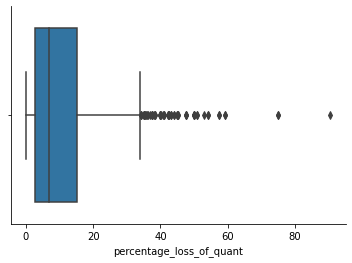

In [121]:
#checking distribution of predictor variable
sns.boxplot(fw_final['percentage_loss_of_quant']) 
sns.despine()

In [122]:
#not plotting but getting stats for the predictor variable

fw_final.describe() #the values for the features don't mean anything as these are categircal/discrete values, not continuous

,percentage_loss_of_quant,country_cat,crop_cat,fsc_location1_cat,causeofloss_cat,timepointyears_cat
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,11.397492,7.342246,33.774332,8.789305,139.691979,14.271658
std,12.092827,5.081612,19.083256,4.975259,74.355556,5.374119
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.800000,3.000000,19.000000,3.000000,74.000000,8.000000
50%,7.000000,6.000000,31.000000,10.000000,148.000000,15.000000
75%,15.300000,12.000000,50.000000,12.000000,198.000000,19.000000
max,90.500000,17.000000,64.000000,16.000000,272.000000,22.000000


<h4>The precentage loss of quantity vs all other features</h4>

C:\Users\maham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


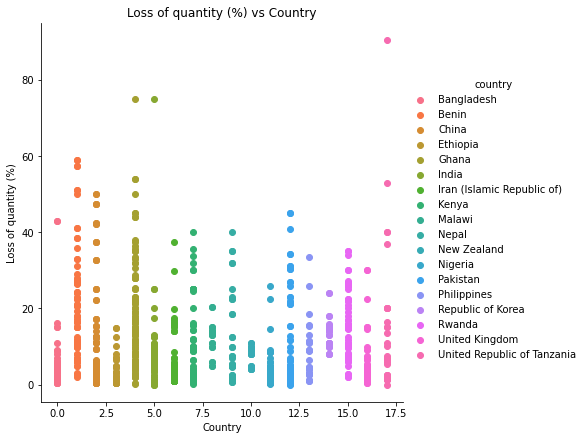

In [123]:
# % loss vs country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'country_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Country',
    xlabel='Country',
    ylabel='Loss of quantity (%)'
))

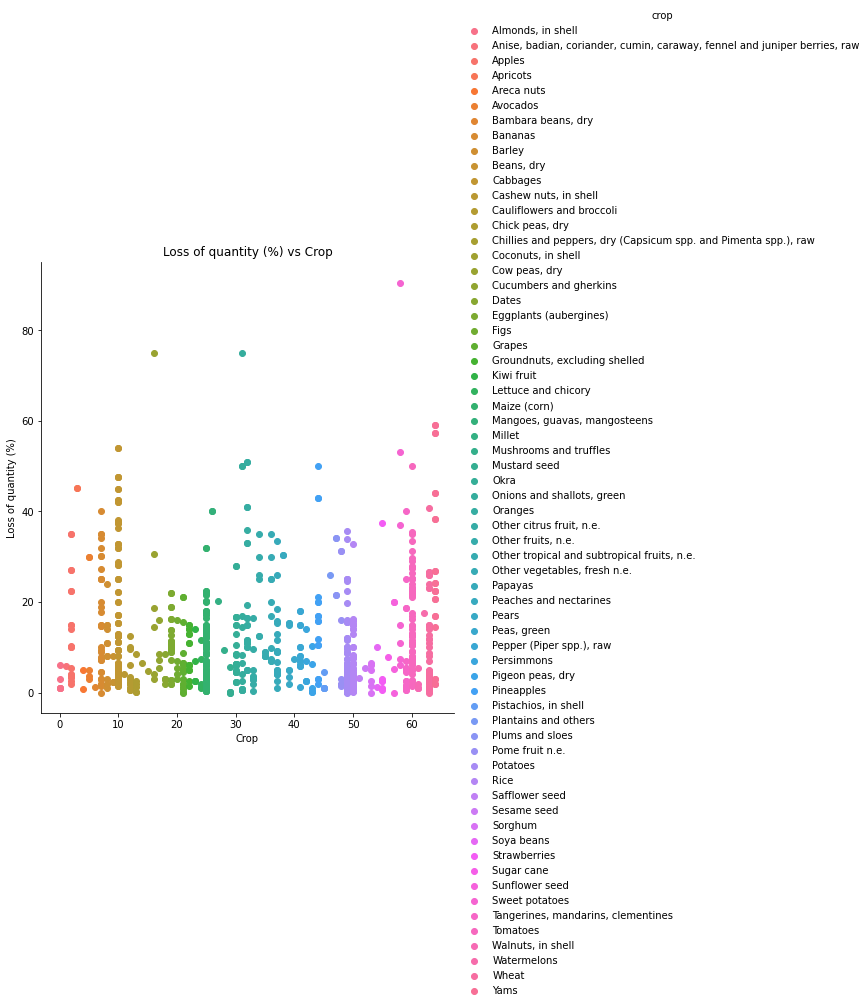

In [124]:
# % loss vs crop
(sns
 .FacetGrid(fw_final, hue='crop', size=7)
 .map(pyplot.scatter, 'crop_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Crop',
    xlabel='Crop',
    ylabel='Loss of quantity (%)'
))

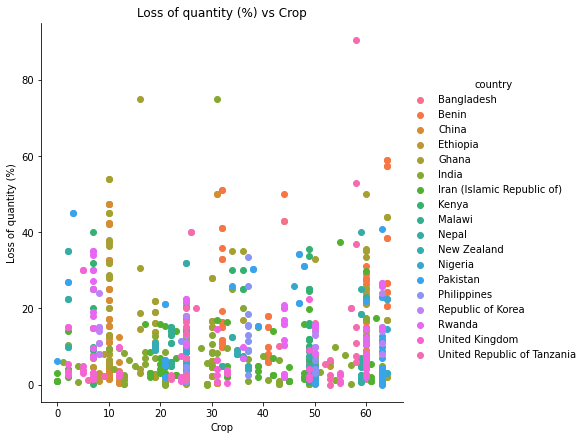

In [125]:
# % loss vs crop by country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'crop_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Crop',
    xlabel='Crop',
    ylabel='Loss of quantity (%)'
))

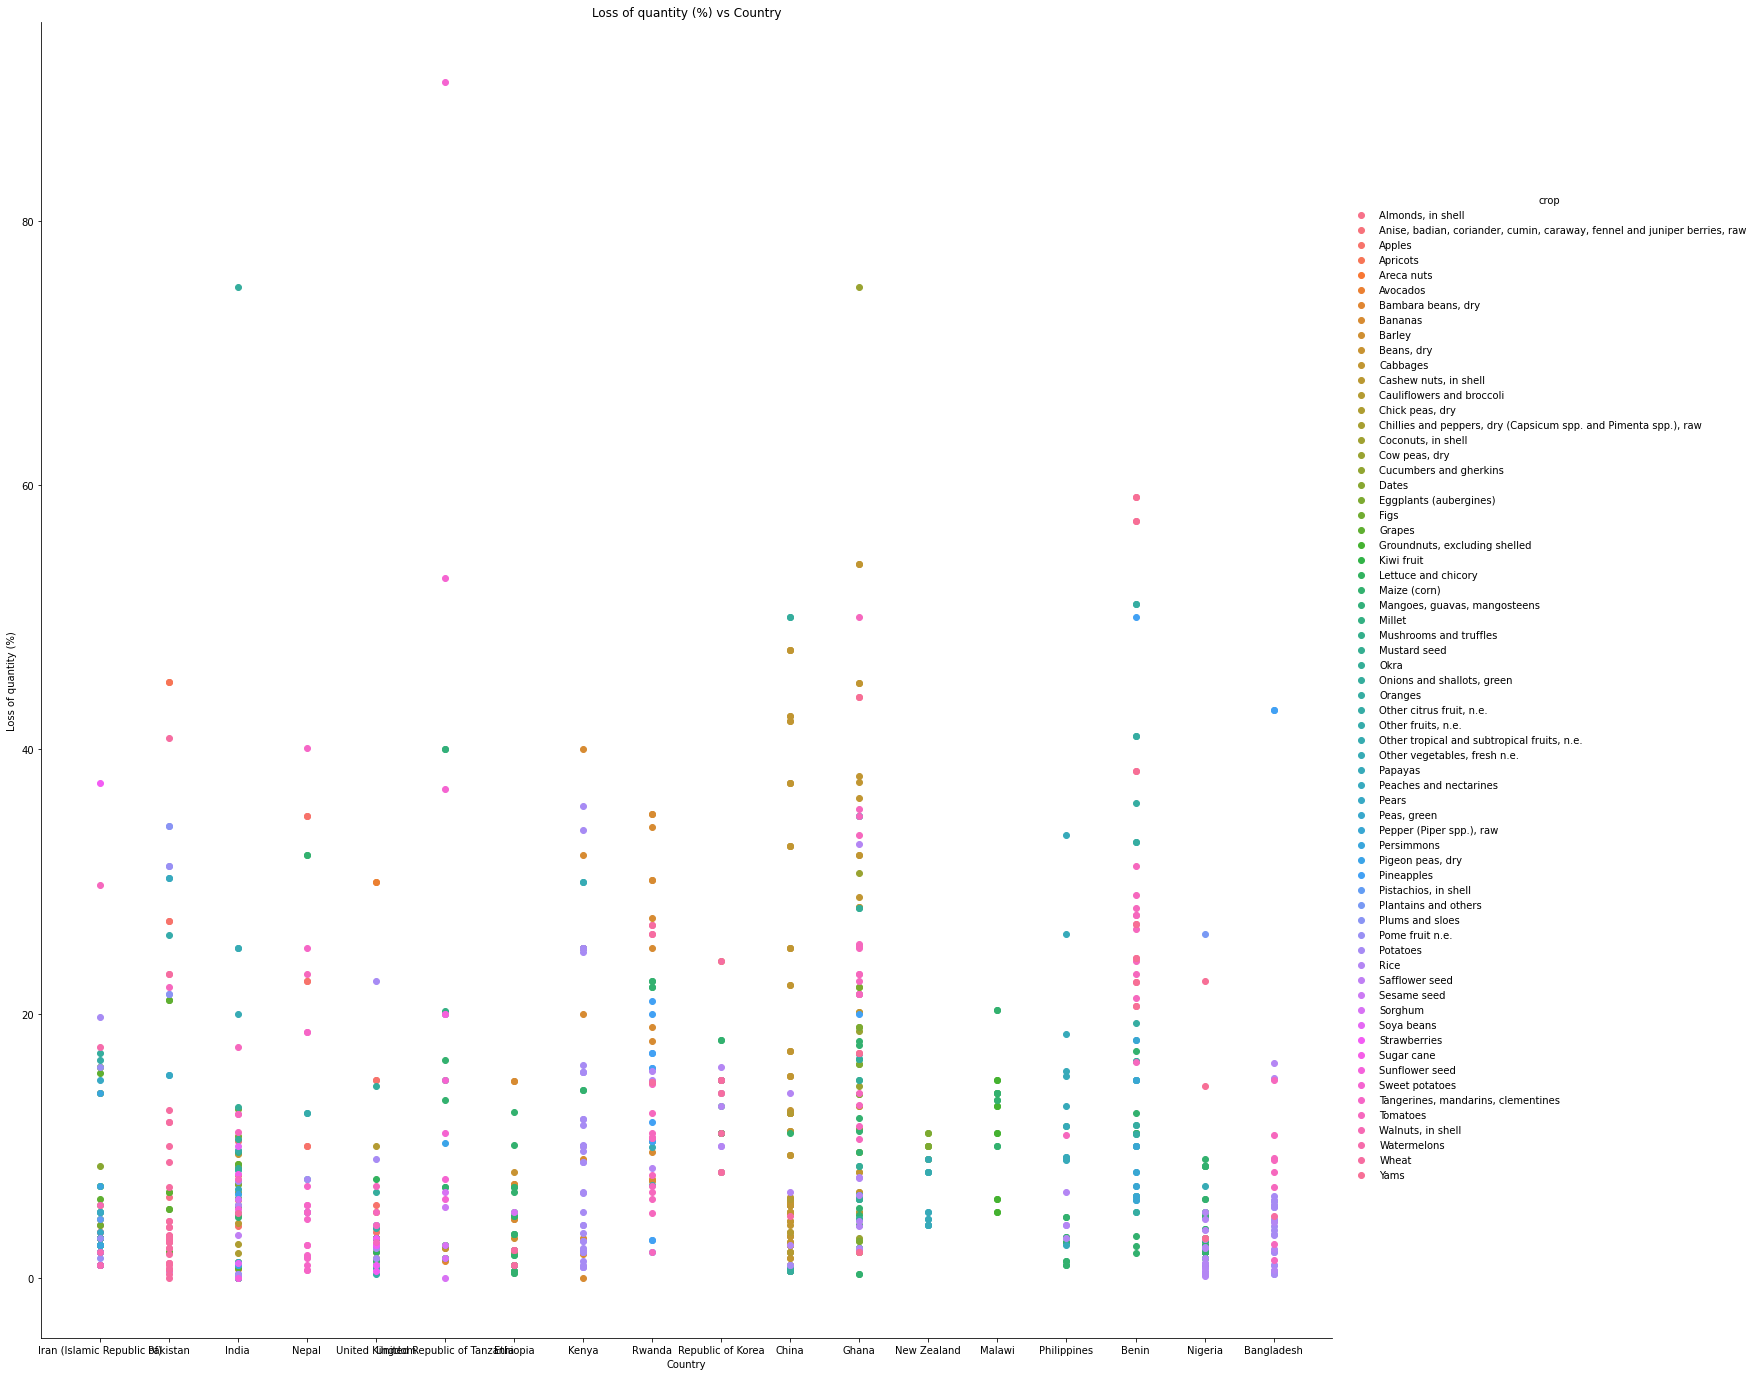

In [126]:
# % loss vs country by crop
(sns
 .FacetGrid(fw_final, hue='crop', size=19)
 .map(pyplot.scatter, 'country', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Country',
    xlabel='Country',
    ylabel='Loss of quantity (%)'
))

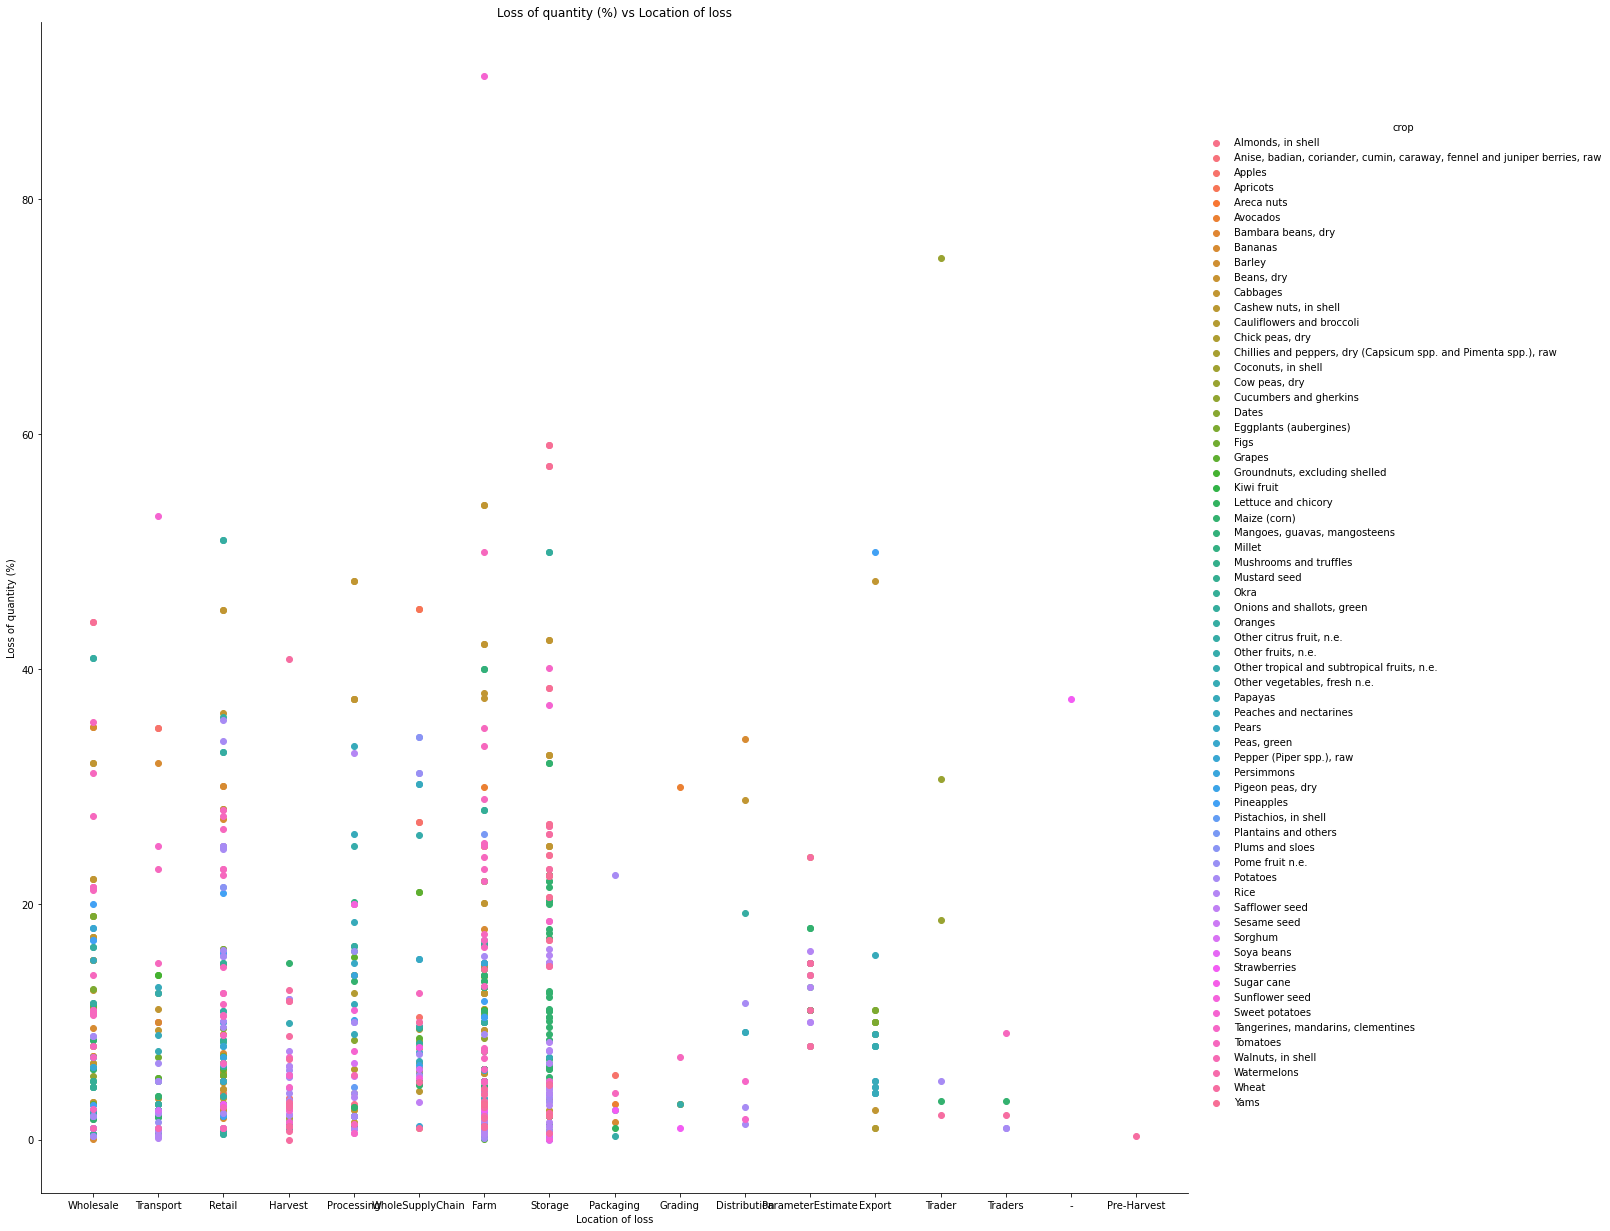

In [127]:
# % loss vs stage/location in supply chain by crop
(sns
 .FacetGrid(fw_final, hue='crop', size=17)
 .map(pyplot.scatter, 'fsc_location1', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Location of loss',
    xlabel='Location of loss',
    ylabel='Loss of quantity (%)'
))

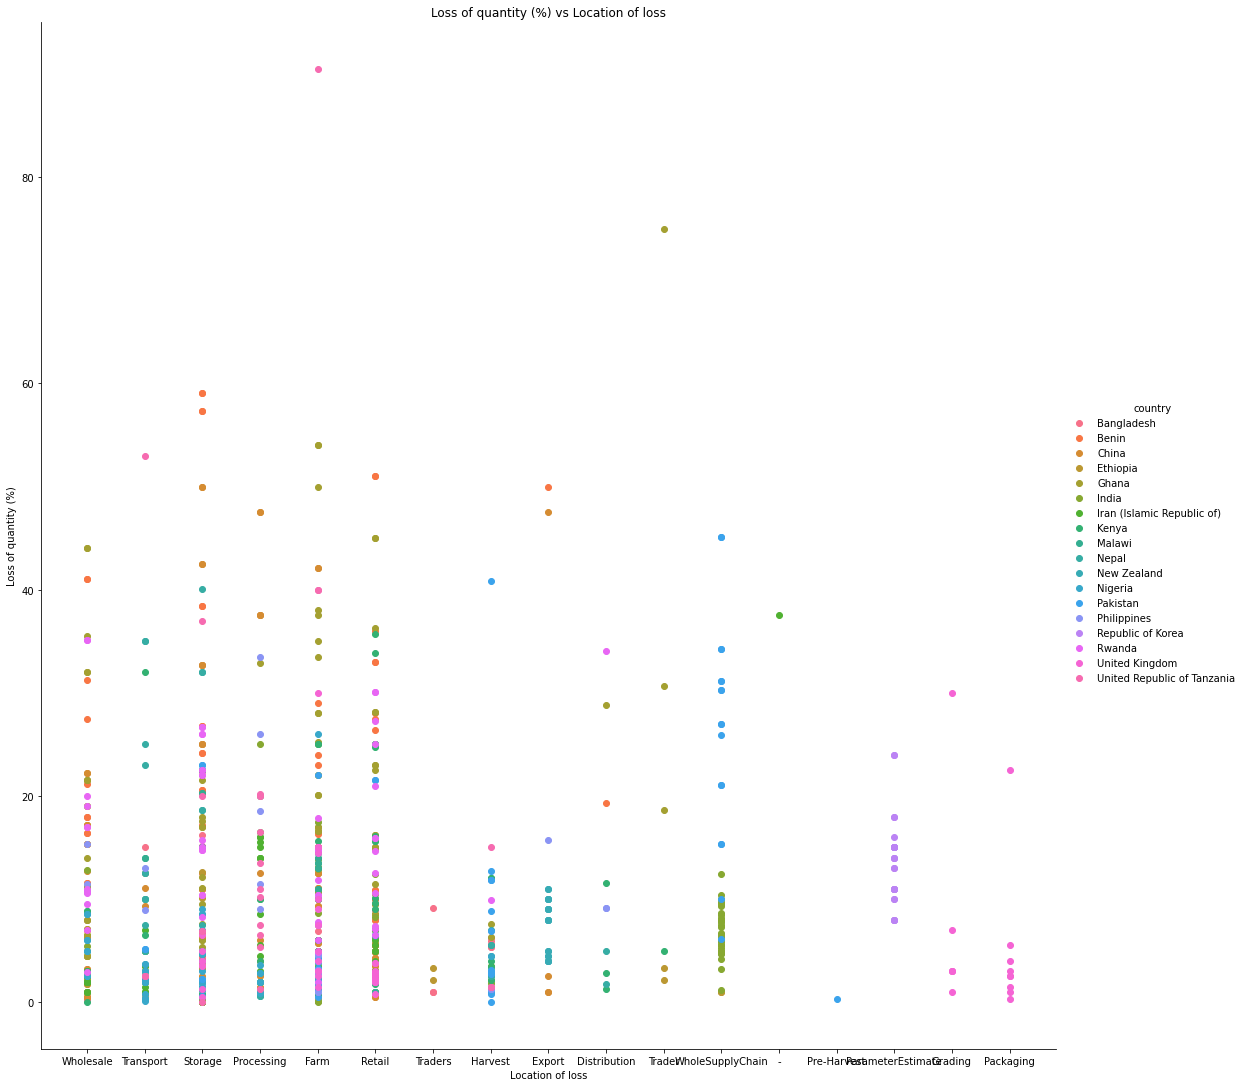

In [128]:
# % loss vs stage/location in supply chain by country
(sns
 .FacetGrid(fw_final, hue='country', size=15)
 .map(pyplot.scatter, 'fsc_location1', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Location of loss',
    xlabel='Location of loss',
    ylabel='Loss of quantity (%)'
))

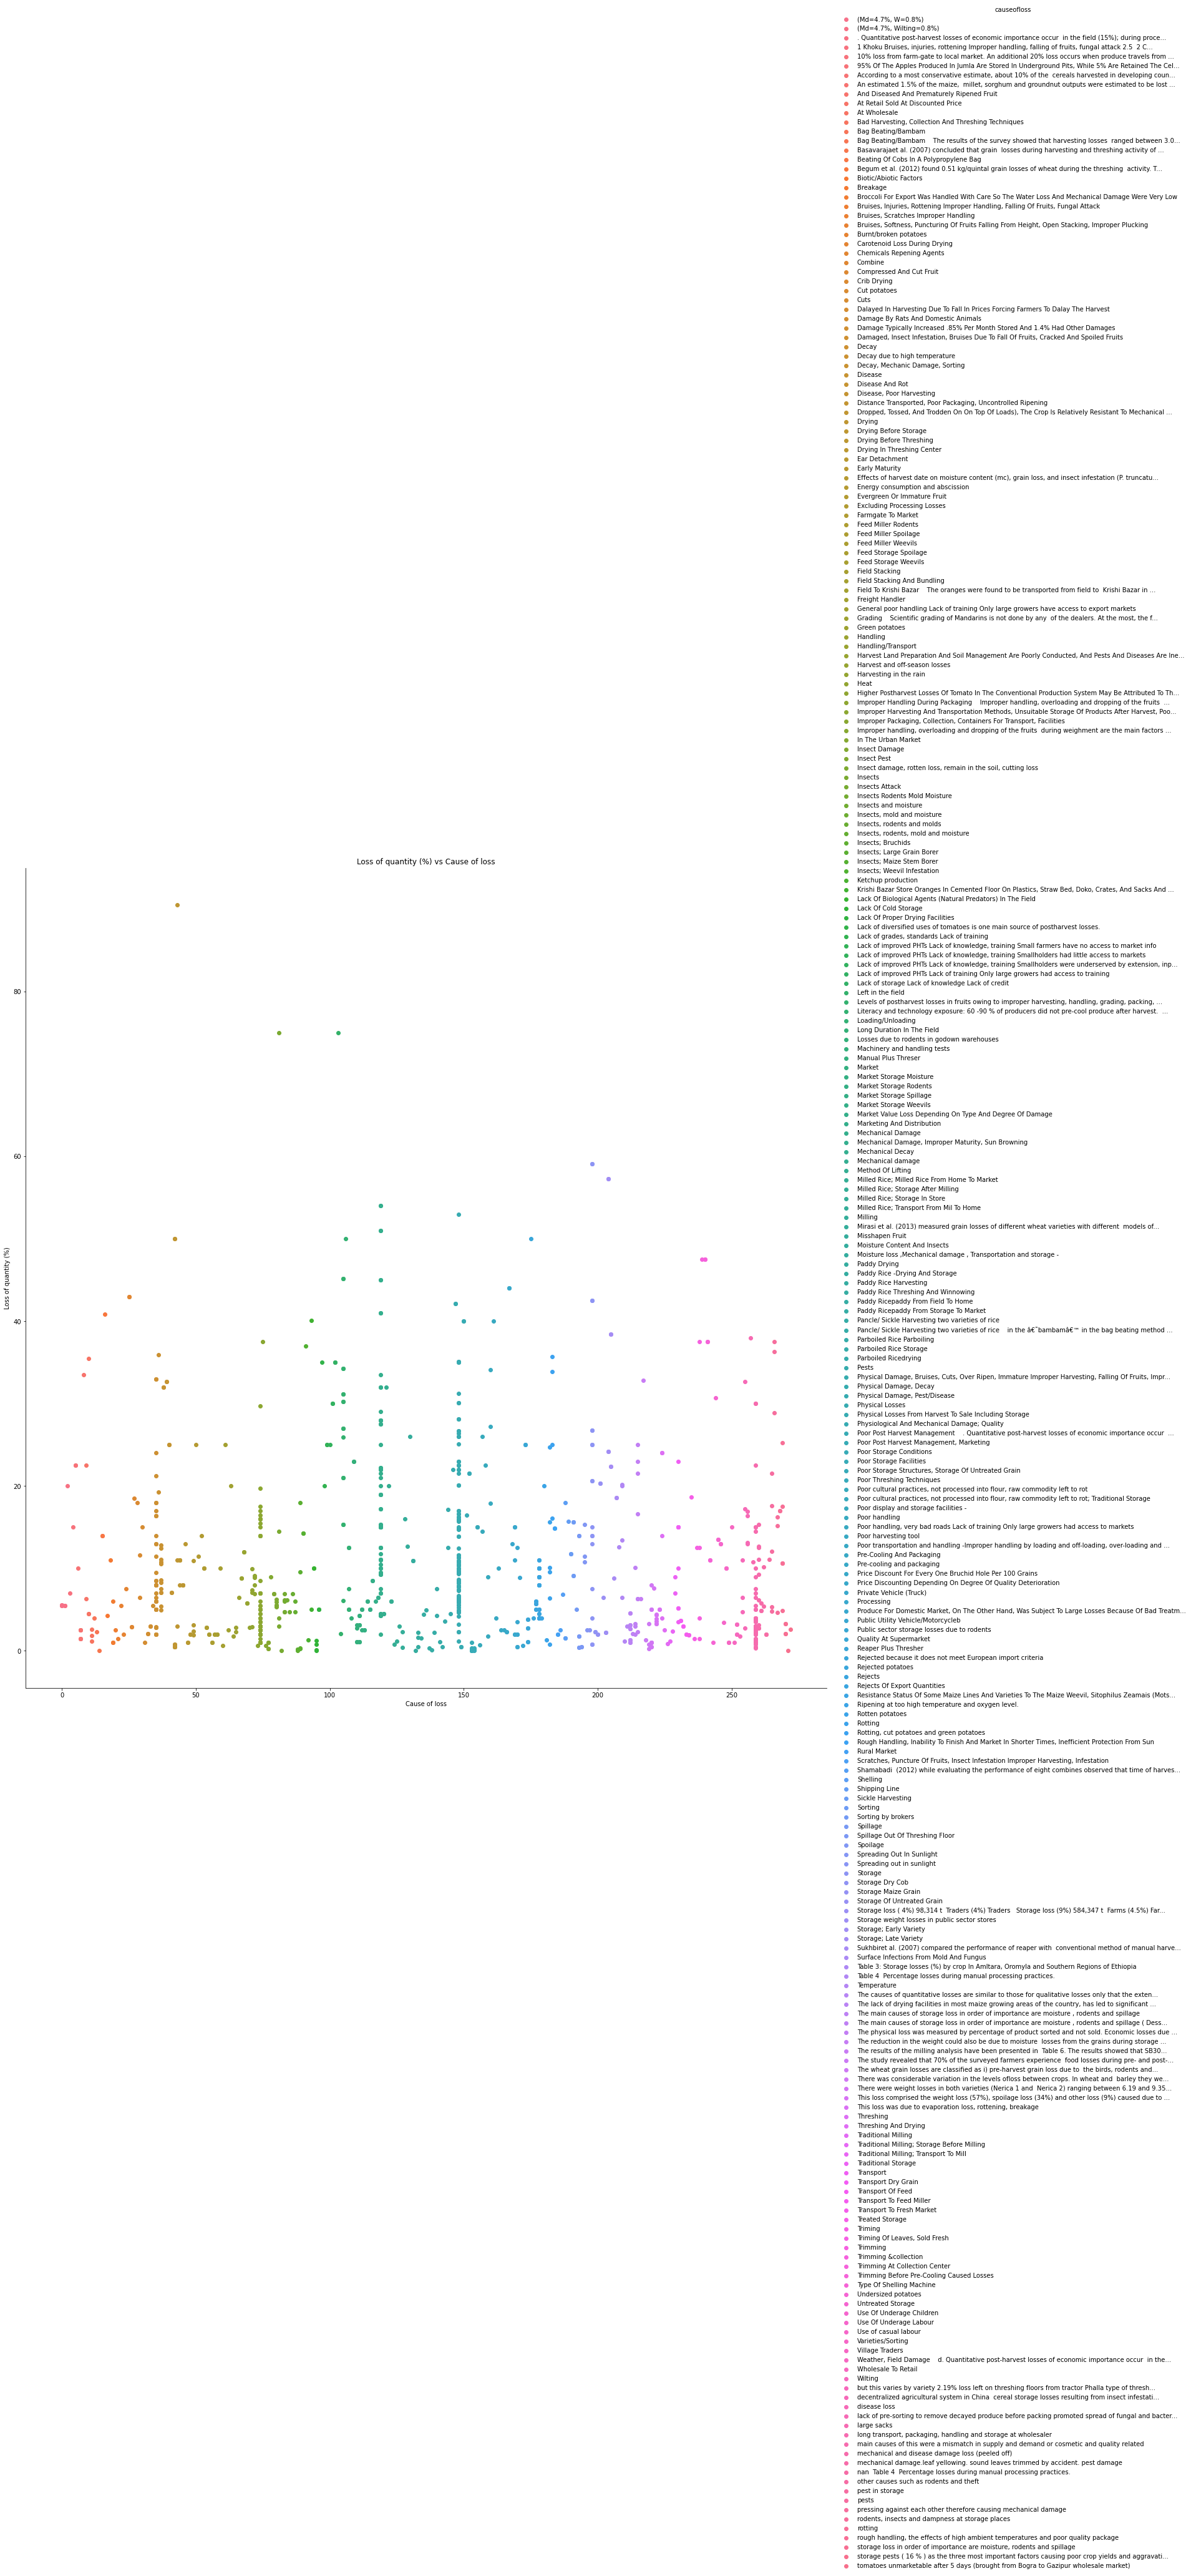

In [129]:
# % loss vs cause of loss
(sns
 .FacetGrid(fw_final, hue='causeofloss', size=19)
 .map(pyplot.scatter, 'causeofloss_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Cause of loss',
    xlabel='Cause of loss',
    ylabel='Loss of quantity (%)'
))

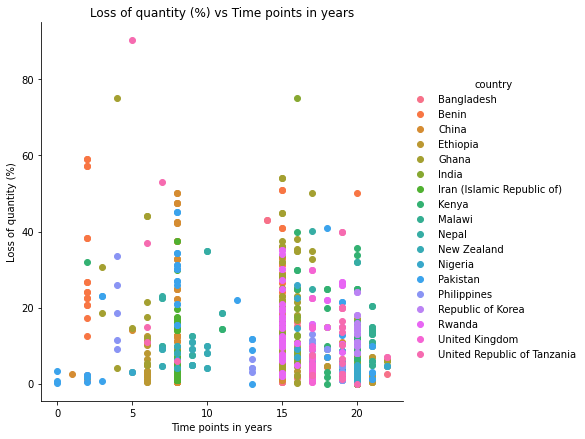

In [130]:
# % loss vs time point by country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'timepointyears_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Time points in years',
    xlabel='Time points in years',
    ylabel='Loss of quantity (%)'
))

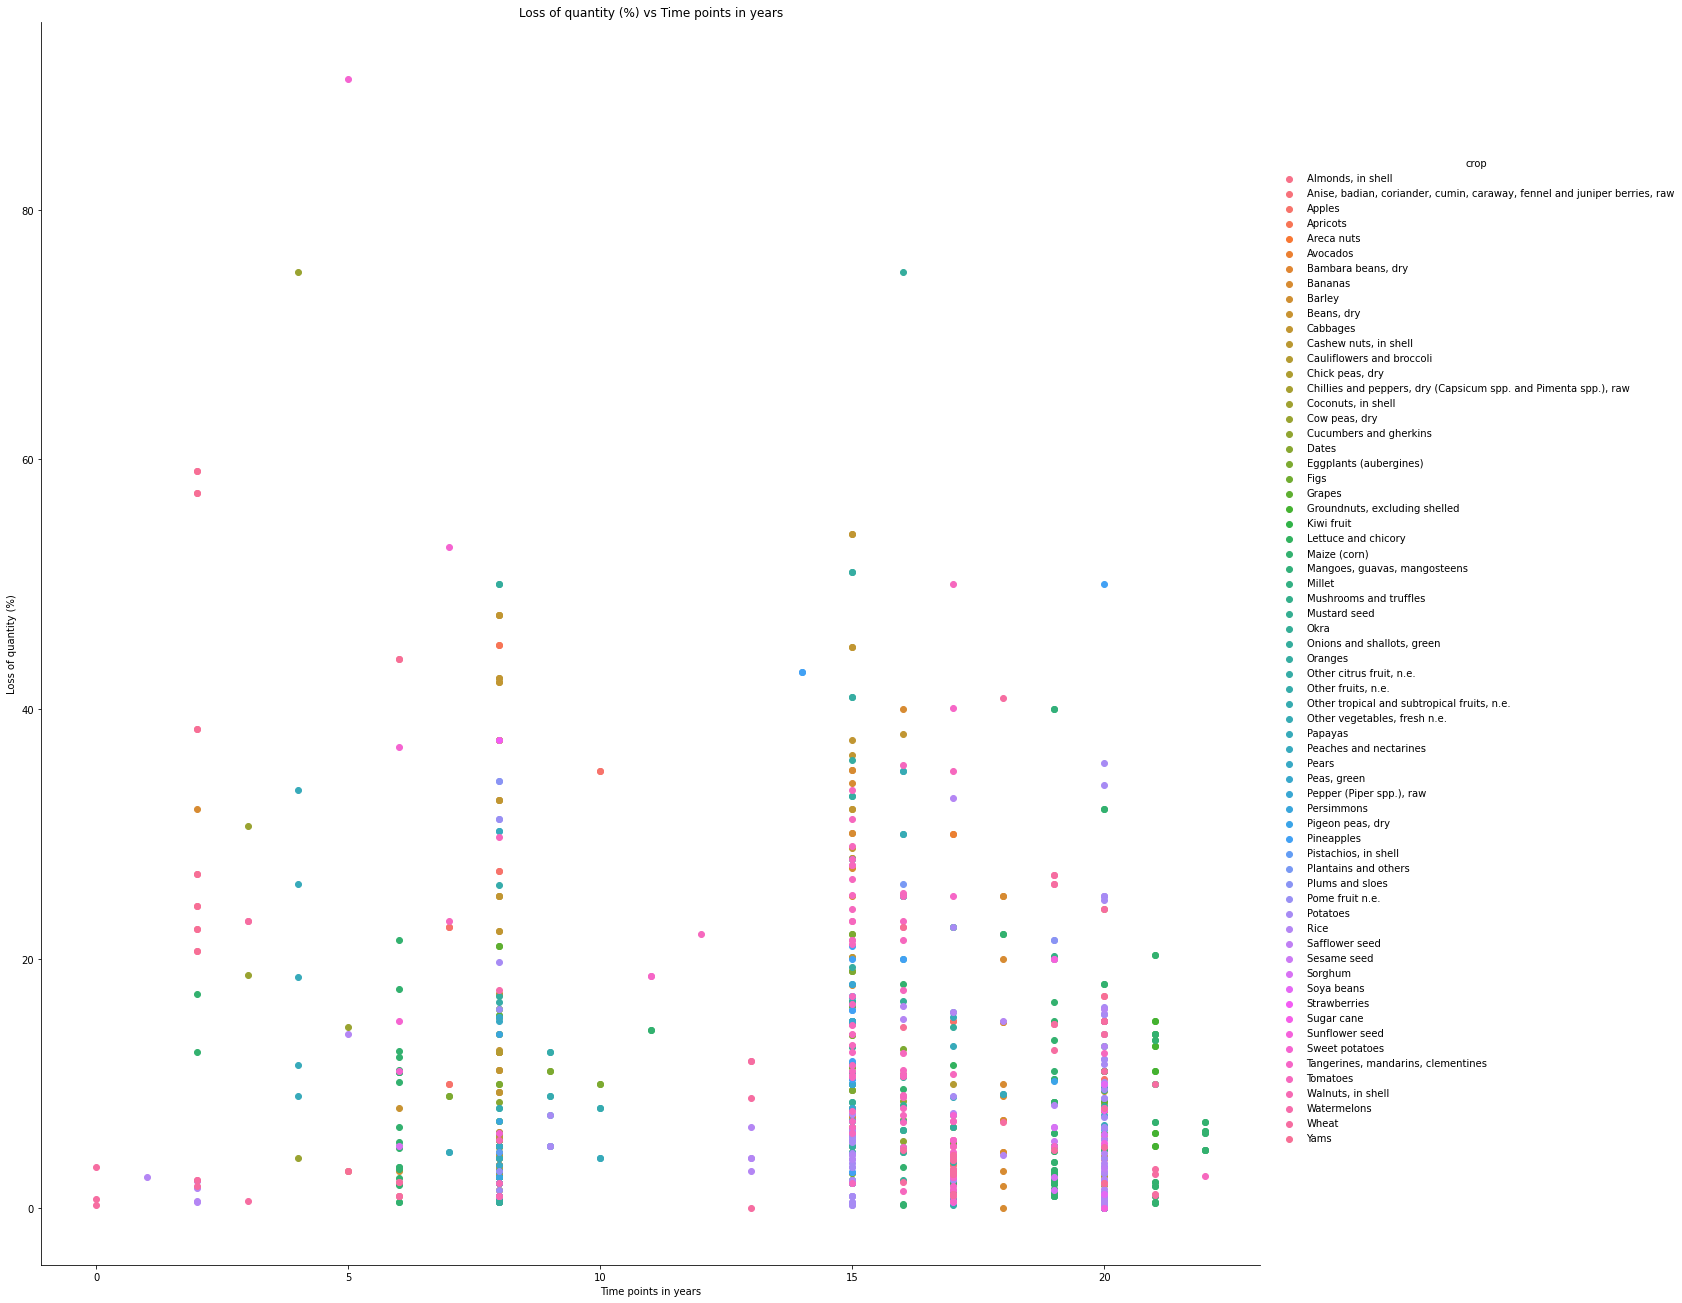

In [131]:
# % loss vs time point by crop
(sns
 .FacetGrid(fw_final, hue='crop', size=18)
 .map(pyplot.scatter, 'timepointyears_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Time points in years',
    xlabel='Time points in years',
    ylabel='Loss of quantity (%)'
))

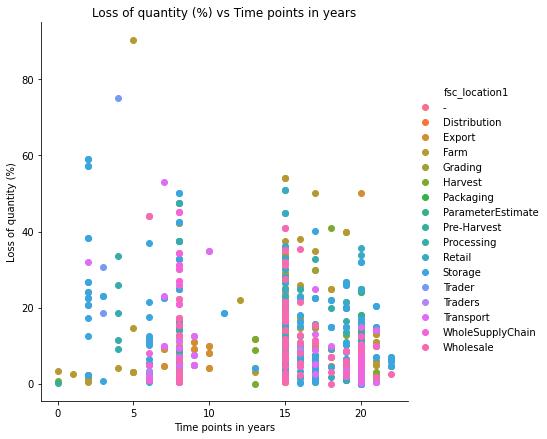

In [132]:
# % loss vs time point by location/stage of supply chain
(sns
 .FacetGrid(fw_final, hue='fsc_location1', size=6)
 .map(pyplot.scatter, 'timepointyears_cat', 'percentage_loss_of_quant')
 .add_legend()
 .set(
    title='Loss of quantity (%) vs Time points in years',
    xlabel='Time points in years',
    ylabel='Loss of quantity (%)'
))

<h4>Checking correlation between features</h4>

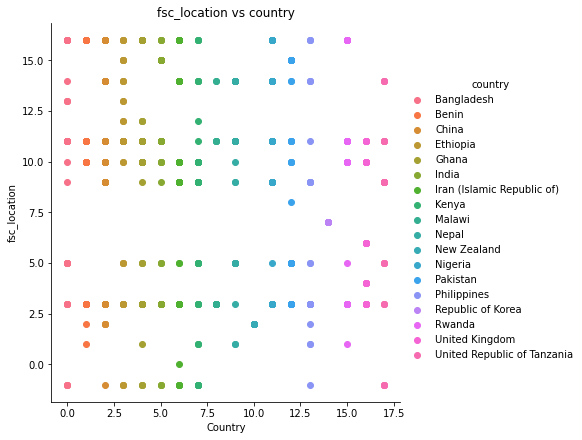

In [133]:
#location/stage vs country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'country_cat', 'fsc_location1_cat')
 .add_legend()
 .set(
    title='fsc_location vs country',
    xlabel='Country',
    ylabel='fsc_location'
))

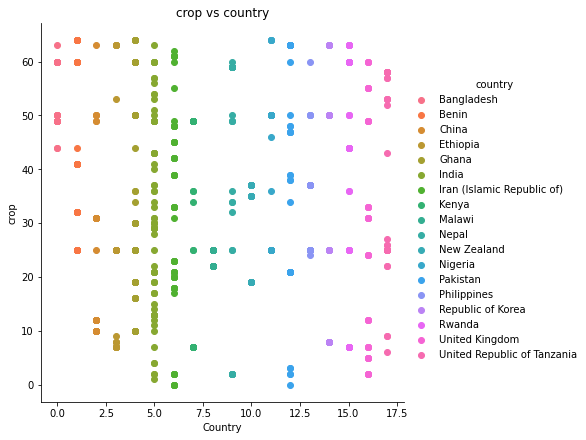

In [134]:
#crop vs country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'country_cat', 'crop_cat')
 .add_legend()
 .set(
    title='crop vs country',
    xlabel='Country',
    ylabel='crop'
))

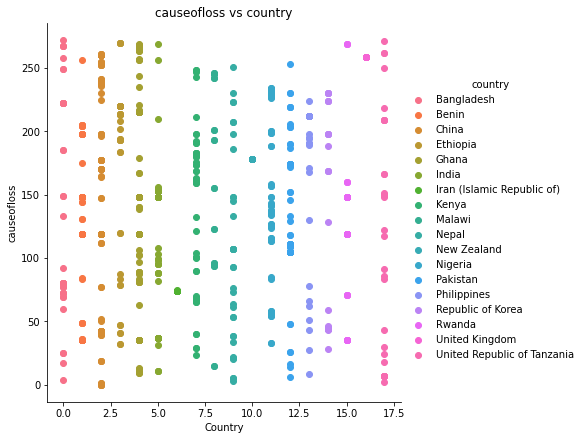

In [135]:
#cause of loss vs country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'country_cat', 'causeofloss_cat')
 .add_legend()
 .set(
    title='causeofloss vs country',
    xlabel='Country',
    ylabel='causeofloss'
))

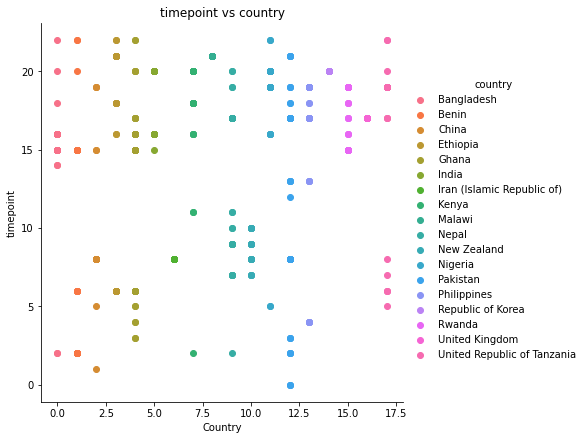

In [136]:
#time point vs country
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'country_cat', 'timepointyears_cat')
 .add_legend()
 .set(
    title='timepoint vs country',
    xlabel='Country',
    ylabel='timepoint'
))

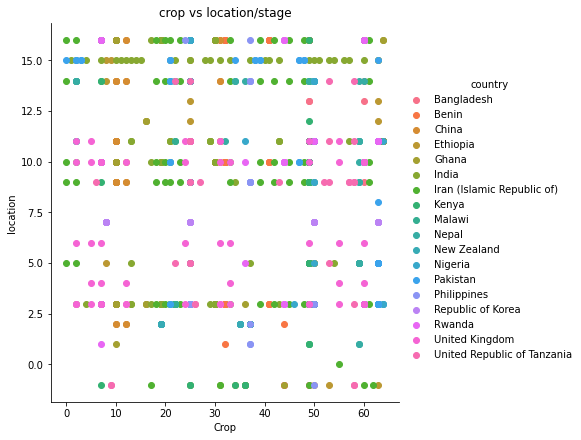

In [137]:
#location/stage vs crop 
(sns
 .FacetGrid(fw_final, hue='country', size=6)
 .map(pyplot.scatter, 'crop_cat', 'fsc_location1_cat')
 .add_legend()
 .set(
    title='crop vs location/stage',
    xlabel='Crop',
    ylabel='location'
))

<h3>Data split</h3>

In [138]:
#60% train, 20% val and test each
train, validate, test = np.split(fw_final.sample(frac=1), [int(.6*len(fw_final)), int(.8*len(fw_final))])

<h5>Checking the splits</h5>

In [139]:
train.shape

(561, 11)

In [140]:
validate.shape

(187, 11)

In [141]:
test.shape

(187, 11)

<h5>Separating predictor and explanatory variables for modeling</h5>

In [142]:
y_train = train['percentage_loss_of_quant']
y_val = validate['percentage_loss_of_quant']
y_test = test['percentage_loss_of_quant']

In [143]:
x_train = train[["country_cat","crop_cat","fsc_location1_cat","causeofloss_cat","timepointyears_cat"]] 
x_val = validate[["country_cat","crop_cat","fsc_location1_cat","causeofloss_cat","timepointyears_cat"]] 
x_test = test[["country_cat","crop_cat","fsc_location1_cat","causeofloss_cat","timepointyears_cat"]] 

<h3>Modeling</h3>

<h5> with sklearn </h5>

In [144]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


y_pred = regr.predict(x_train)
print('prediction on x_train: \n', y_pred)

Intercept: 
 17.547496152817445
Coefficients: 
 [ 0.00267627  0.00226233  0.04930843 -0.00056735 -0.43716131]
prediction on x_train: 
 [ 8.89274366 10.46813125 10.33960243 13.72114195  9.48235938  9.33884716
 14.50375122 11.10772346 11.30208486  9.7823011  11.49071704 11.77361863
 10.69466837 11.0873625  15.6619306  14.59494604 15.56290908 14.34366162
 10.22017615 14.56307314  9.88555411 14.80282829 11.17183394  8.95918738
 14.5984476  13.72114195 17.25069639  9.47557239 10.05168554  9.17292701
 10.33329261  8.58449216 12.71364404 15.38383673  9.26238035 12.71364404
 10.37534544 10.32445684  9.36869214 14.84834419 15.41009528  9.64940209
 14.82318925  8.49024401  9.16952291 15.10388797 10.53186301 14.91501912
 10.67567715 14.84834419 15.45183274  9.36042985  9.08848958 11.49663197
 11.46933558 14.5712658  15.17622657 14.04510326  9.30947035 10.31200601
 11.28157867  9.88668881 11.75102405 14.76210636 14.76916267 15.10388797
 10.05481578  9.13679336 14.5218884  17.25069639 10.54226444 1

<h5> with statsmodels </h5>

In [145]:
##training set

X = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(y_train, X).fit()
preds = model.predict(X) 
 
print_model = model.summary()
print(print_model)

##statsmodel and sklearn gave the same answers for intercept and coeeficient

                               OLS Regression Results                               
Dep. Variable:     percentage_loss_of_quant   R-squared:                       0.038
Model:                                  OLS   Adj. R-squared:                  0.029
Method:                       Least Squares   F-statistic:                     4.361
Date:                      Thu, 15 Oct 2020   Prob (F-statistic):           0.000667
Time:                              18:53:24   Log-Likelihood:                -2183.6
No. Observations:                       561   AIC:                             4379.
Df Residuals:                           555   BIC:                             4405.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Note: we tried one hot encoding after this, but with limited time it was proving too challenging and so we decided to not do that. We also did not include any interaction terms as there was not a lot correlation between the features through the plots we created, for the ones where there was some correlation, we felt that we didn't have enough tome to include them so we decided to leave them out. 

<h3>Evaluation</h3>

In [146]:
##checking model summary with validation set 
X_val = sm.add_constant(x_val) # adding a constant
 
model = sm.OLS(y_val, X_val).fit()
preds = model.predict(X_val) 
 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     percentage_loss_of_quant   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.019
Method:                       Least Squares   F-statistic:                     1.714
Date:                      Thu, 15 Oct 2020   Prob (F-statistic):              0.133
Time:                              18:53:24   Log-Likelihood:                -725.86
No. Observations:                       187   AIC:                             1464.
Df Residuals:                           181   BIC:                             1483.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [147]:
##checking model summary with test set [FINAL]
X_test = sm.add_constant(x_test) # adding a constant
 
model = sm.OLS(y_test, X_test).fit()
preds = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     percentage_loss_of_quant   R-squared:                       0.043
Model:                                  OLS   Adj. R-squared:                  0.016
Method:                       Least Squares   F-statistic:                     1.623
Date:                      Thu, 15 Oct 2020   Prob (F-statistic):              0.156
Time:                              18:53:24   Log-Likelihood:                -727.44
No. Observations:                       187   AIC:                             1467.
Df Residuals:                           181   BIC:                             1486.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------